### Computer Vision and Convolutional Neural Networks

In [1]:
%pwd

'/home/pranshumaan'

In [2]:
%cd /media/pranshumaan/TOSHIBA\ EXT

/media/pranshumaan/TOSHIBA EXT


In [3]:
%cd Dev/
%ls
%pwd
%cd Deep_Learning_Pytorch_Udemy_Tutorial/

/media/pranshumaan/TOSHIBA EXT/Dev
data/  Deep_Learning_Pytorch_Udemy_Tutorial/
/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial


In [4]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

In [5]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [6]:
print(torch.__version__)
print(torchvision.__version__)

1.11.0+cu113
0.12.0+cu113


In [7]:
# Set up training data
from torchvision import datasets

train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download = True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root = "data",
                                   train = False,
                                   download = True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None)

In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
type(train_data[0])

tuple

In [10]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [11]:
train_data[0][1]

9

In [12]:
train_data[1][1]

0

In [13]:
train_data[2][1]

0

In [14]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [15]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [16]:
class_to_idx = train_data.class_to_idx

In [17]:
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [18]:
import numpy as np

In [19]:
train_data[0][0].numpy()[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

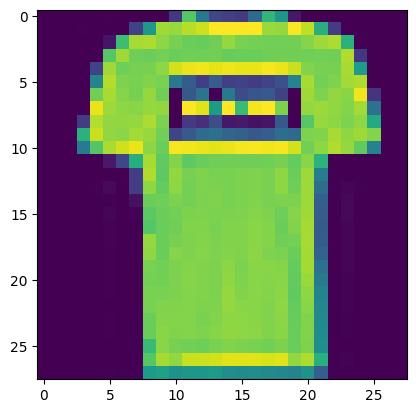

In [20]:
plt.imshow(train_data[1][0].numpy()[0], interpolation='nearest')

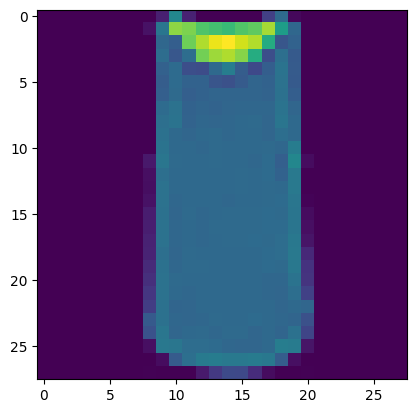

In [21]:
plt.imshow(train_data[2][0].numpy()[0], interpolation='nearest')

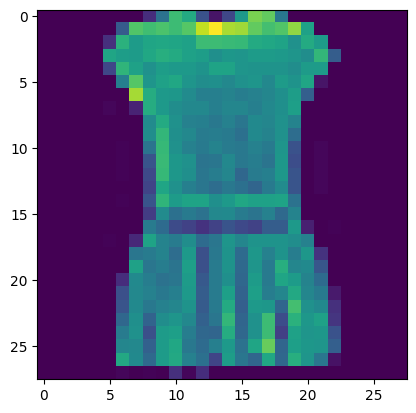

In [22]:
plt.imshow(train_data[3][0].numpy()[0], interpolation='nearest')

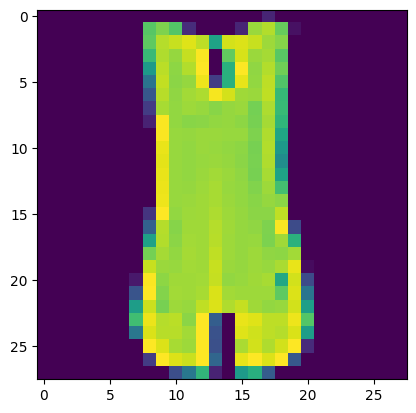

In [23]:
plt.imshow(train_data[4][0].numpy()[0], interpolation='nearest')

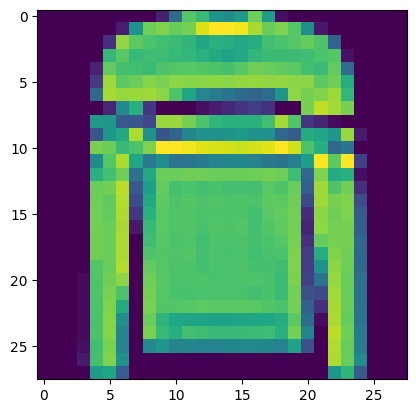

In [24]:
plt.imshow(train_data[5][0].numpy()[0], interpolation='nearest')

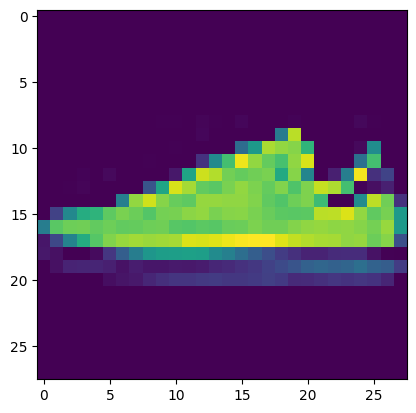

In [25]:
plt.imshow(train_data[6][0].numpy()[0])

T-shirt/top


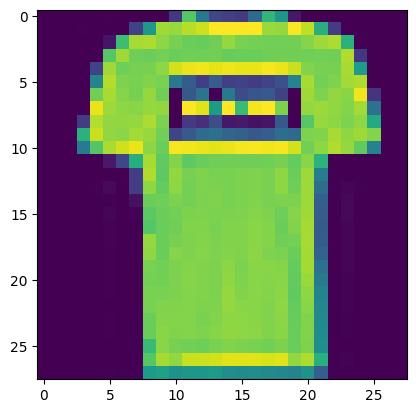

In [26]:
image, label = train_data[1]
plt.imshow(image.squeeze())
print(class_names[label])

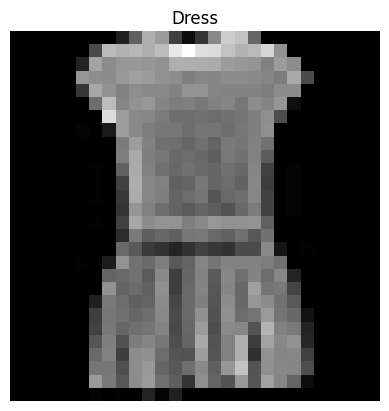

In [27]:
image, label = train_data[3]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

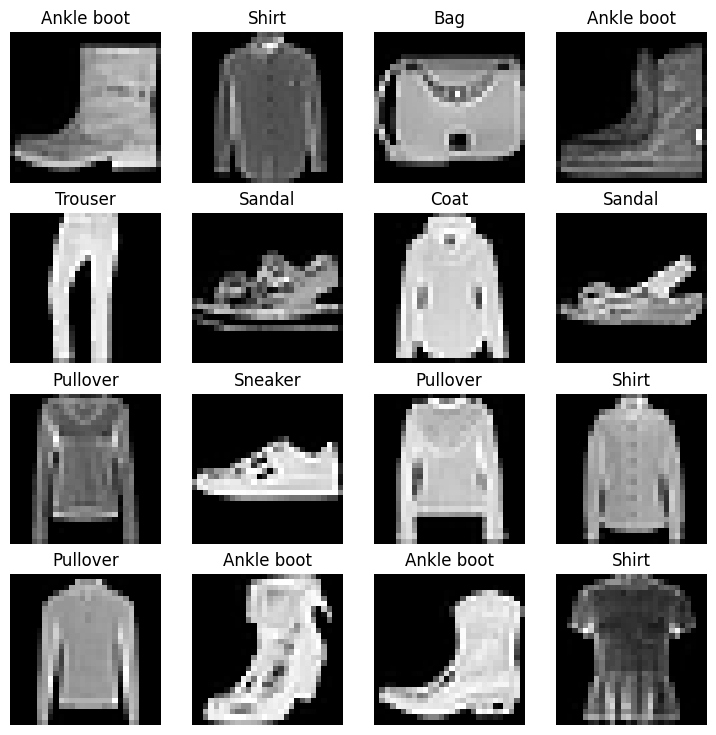

In [28]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [29]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

In [30]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [31]:
# Prepare data loader - turns data set into a python iterable
# More specifically, it organizes data into batches of say 32

from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb25acc3ee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb25acc33d0>)

In [32]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb25acc3ee0>, <torch.utils.data.dataloader.DataLoader object at 0x7fb25acc33d0>)
Length of the train_dataloader: 1875 batches of 32
Length of the test_dataloader: 313 batches of 32


In [33]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


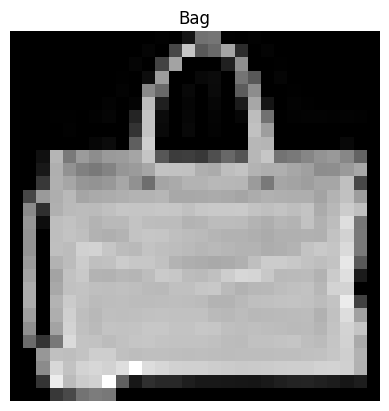

In [34]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [35]:
# Model

flatten_model = nn.Flatten() #Reshapes input into a 1D Tensor

x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [36]:
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [37]:
from torch import nn
class FashionMNISTModelv0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features=input_shape,
                                                   out_features=hidden_units),
                                         nn.Linear(in_features=hidden_units,
                                                   out_features=output_shape))
    def forward(self, x):
        return self.layer_stack(x)

In [38]:
torch.manual_seed(42)

model_0 = FashionMNISTModelv0(input_shape=784, #i.e. 28*28
                              hidden_units=10,
                              output_shape=len(class_names)
                             ).to('cpu')
model_0

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [39]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [40]:
model_0(dummy_x).shape

torch.Size([1, 10])

In [41]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

In [42]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [43]:
# Loss function, optimizer and evaluation metrics

In [44]:
# Accuracy function
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

#### Tracking the time taken
Two things to track are:
    1. Model's performance
    2. How fast it runs

In [46]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
    total_time = end-start
    print(f"Train time on {device}: {total_time}.3f seconds")
    return total_time

In [47]:
start_time = timer()
#some code...
end_time = timer()
print_train_time(start_time, end_time, 'cpu')

Train time on cpu: 7.523700014644419e-05.3f seconds


7.523700014644419e-05

#### Note: The optimizer is stepped once per batch rather than once per epoch
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the **training loss per batch**
3. Loop through test batches, perform testing steps, calculate the **test loss per batch**
4. Print out epoch, batch, loss and accuracy
5. Time it all

In [48]:
from tqdm.notebook import tqdm
# Progress bar

In [49]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        #forward pass
        y_pred = model_0(X)
        #loss
        loss = loss_fn(y_pred, y)
        train_loss += loss #loss accumulates over the batch
        #optimizer zero grad 
        optimizer.zero_grad() #happens per batch
        #backpropagation
        loss.backward() #happens per batch
        #optimizer step
        optimizer.step() #happens per batch
        
        if batch%80 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train_dataloader
    train_loss /= len(train_dataloader)
    
    # Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        
        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device=str(next(model_0.parameters()).device))
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 2560/60000 samples.
Looked at 5120/60000 samples.
Looked at 7680/60000 samples.
Looked at 10240/60000 samples.
Looked at 12800/60000 samples.
Looked at 15360/60000 samples.
Looked at 17920/60000 samples.
Looked at 20480/60000 samples.
Looked at 23040/60000 samples.
Looked at 25600/60000 samples.
Looked at 28160/60000 samples.
Looked at 30720/60000 samples.
Looked at 33280/60000 samples.
Looked at 35840/60000 samples.
Looked at 38400/60000 samples.
Looked at 40960/60000 samples.
Looked at 43520/60000 samples.
Looked at 46080/60000 samples.
Looked at 48640/60000 samples.
Looked at 51200/60000 samples.
Looked at 53760/60000 samples.
Looked at 56320/60000 samples.
Looked at 58880/60000 samples.

Train loss: 0.5904 | Test loss: 0.5102 | Test acc: 82.0387
Train time on cpu: 4.191179735000333.3f seconds
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 2560/60000 samples.
Looked at 5120/60000 samples.
Looked at 7680/60000 samples.
Looked

In [50]:
#### Making predictions and getting Model 0 Results
def ModelPredictor(model, X):
    y_pred = model(X).argmax(dim=1).item()
    return y_pred

Predicted Label: Sandal | Actual Label: Sandal | Correct!!!


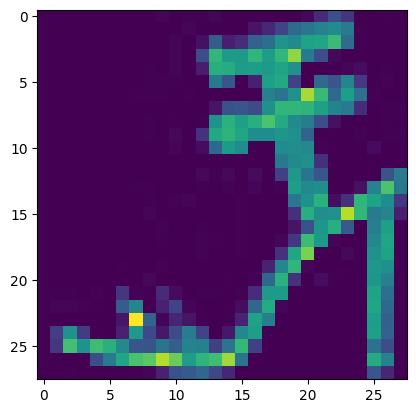

In [51]:
random_idx = torch.randint(0, len(test_data), size=[1]).item()
img, label = test_data[random_idx][0], test_data[random_idx][1]

predicted_label = ModelPredictor(model_0, img)

if predicted_label==label:
    remark = "Correct!!!"
else:
    remark = "Incorrect"
    
print(f"Predicted Label: {class_names[predicted_label]} | Actual Label: {class_names[label]} | {remark}")
plt.imshow(img[0]);

In [67]:
device

'cuda'

In [76]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X,y,model = X.to(device), y.to(device), model.to(device)
            y_pred = model(X).to(device)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"Model_name": model.__class__.__name__,
            "Model_loss": loss.item(),
            "Model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelv0',
 'Model_loss': 0.5120081901550293,
 'Model_acc': 83.02715654952077}

In [53]:
!nvidia-smi

Sun May 14 09:40:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   59C    P8    10W /  60W |     46MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [54]:
torch.cuda.is_available()

True

#### Setting up device agnostic code

In [55]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### Modifying the model to introduce non-linearity

In [56]:
list(enumerate(train_dataloader))

[(0,
  [tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             ...,
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
   
   
           [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             ...,
             [0.0000, 0.0000, 0.0000,  ..., 0.1804, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.1647, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
   
   
           [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
             [0.0000, 0.0000, 0.0000,  ...

In [57]:
class FashionMNISTModelv1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features=input_shape,
                                                   out_features=hidden_units),
                                         nn.ReLU(),
                                         nn.Linear(in_features=hidden_units,
                                                   out_features=output_shape),
                                         nn.ReLU())
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [58]:
torch.manual_seed(42)
model_1 = FashionMNISTModelv1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

In [59]:
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr = 0.1)
# Not creating a loss function as we can use the one created earlier (Cross Entropy)

#### Functionizing the training and testing loops

In [60]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
       
    train_loss = 0
    train_acc = 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        #forward pass
        y_pred = model(X)
        #loss
        loss = loss_fn(y_pred, y)
        train_loss += loss #loss accumulates over the batch
        acc = accuracy_fn(y_true = y,
                          y_pred = y_pred.argmax(dim=1)) #logits to prediction labels
        train_acc += acc
        #optimizer zero grad 
        optimizer.zero_grad() #happens per batch
        #backpropagation
        loss.backward() #happens per batch
        #optimizer step
        optimizer.step() #happens per batch


    # Divide total train loss by length of train_dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [61]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0,0
    model.eval()
    
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [62]:
from timeit import default_timer as timer

train_time_start_on_gpu = timer()
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}/n------")
    train_step(model_1,
               train_dataloader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device)
    test_step(model_1,
              test_dataloader,
              loss_fn,
              accuracy_fn,
              device)

train_time_end_on_gpu = timer()
total_train_time_model = print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0/n------
Train loss: 1.07991 | Train acc: 61.59%
Test loss: 0.94823 | Test acc: 65.27%
Epoch: 1/n------
Train loss: 0.92729 | Train acc: 65.96%
Test loss: 0.93710 | Test acc: 65.96%
Epoch: 2/n------
Train loss: 0.88906 | Train acc: 66.93%
Test loss: 0.91971 | Test acc: 65.79%
Train time on cuda: 12.623329109999759.3f seconds


In [77]:
model_0_results

{'Model_name': 'FashionMNISTModelv0',
 'Model_loss': 0.5120081901550293,
 'Model_acc': 83.02715654952077}

In [78]:
total_train_time_model_0

12.55310571400014

In [79]:
# model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [80]:
model_1_results

{'Model_name': 'FashionMNISTModelv1',
 'Model_loss': 0.9199374318122864,
 'Model_acc': 65.79472843450479}

### Building a Convolutional Neural Network

See next notebook